In [1]:
%load_ext autoreload
%autoreload 

In [2]:

import os 
import shutil
import numpy as n
from datetime import date
from matplotlib import pyplot as plt
import time

os.chdir('/home/ali/packages/s2p-lbm/')
from scipy import stats
import suite2p
from suite3d import plot_utils as plot

In [3]:
from importlib import reload
from pathlib import Path

In [4]:
from suite3d.job import Job

job = Job('/mnt/md0/runs','SS003_2024-08-06_1-2-3-4-5-6', create=False)

No skimage
Missing some packages
Install gitpython for dev benchmarking to work
NO MRCFILE
Issues importing compute components
No Napari
No PyQtGraph
   Found and loaded params from /mnt/md0/runs/s3d-SS003_2024-08-06_1-2-3-4-5-6/params.npy


In [ ]:
# for a 76 minute recording

In [10]:
8980/60

149.66666666666666

In [5]:
timings_s2p_plane = {
    # 'init' : 11.7,
    'mcorr' :156.43,
    'detect' : 182.28,
    'extract' : 35.06,
}
# plane_time_s2p = 378 #59.9 * 192 / 9

time_s2p = 8980 #  plane_time_s2p * 20

timings_s3d = {
    'init' : 5*60 + 2,
    'mcorr' : 73 * 60,
    'detect' : 1114,
    'segment' : 1814, # 143 * 60,
    'extract' : 1036,
}
time_s3d = n.sum(timings_s3d[k] for k in timings_s3d.keys())

/tmp/ipykernel_154143/2265876133.py:18: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  time_s3d = n.sum(timings_s3d[k] for k in timings_s3d.keys())


In [6]:
timings_s3d_frac = {}
for k in timings_s3d.keys():
    timings_s3d_frac[k] = timings_s3d[k] / sum((list(timings_s3d.values())))

timings_s2p_frac = {}
timings_s2p = {}
for k in timings_s2p_plane.keys():
    timings_s2p_frac[k] = timings_s2p_plane[k] / sum((list(timings_s2p_plane.values())))
    timings_s2p[k] = time_s2p * timings_s2p_frac[k]
timings_s2p['io'] = 103*60+5

In [7]:
fig_dir = Path('/mnt/md0/s3d-figures/fig-val/')

os.makedirs(fig_dir, exist_ok=True)

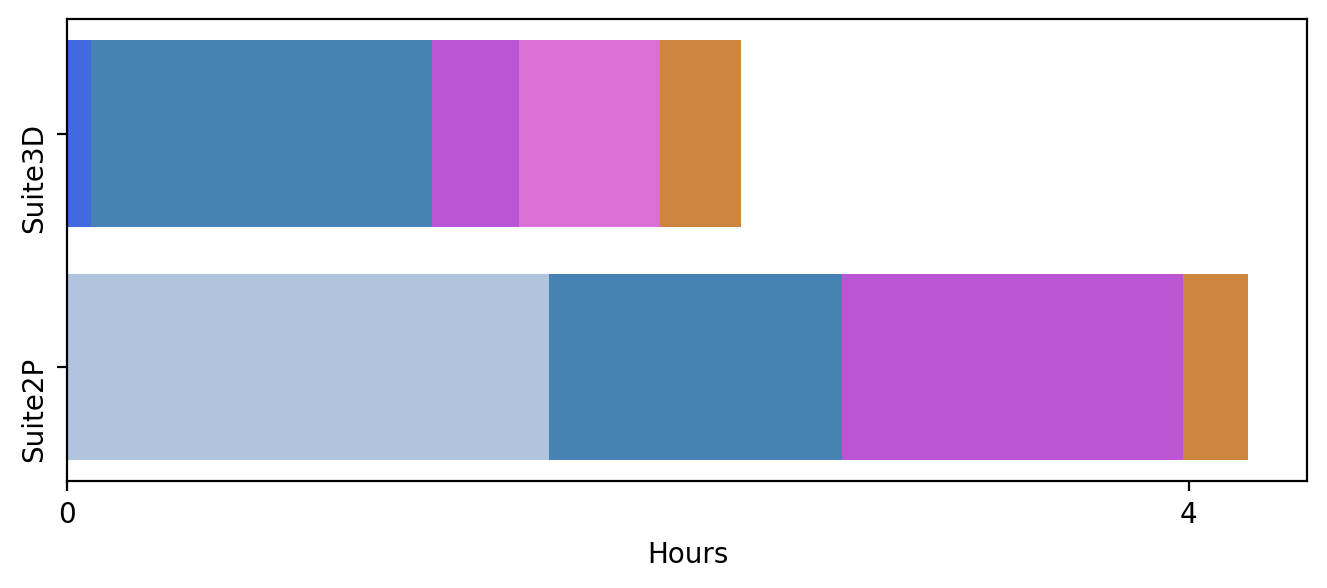

In [8]:
f,ax = plt.subplots(figsize=(8,3),dpi=200)
posy = n.zeros(2)
posx = [1,2]
colors = {'init' : 'royalblue',
          'mcorr': 'steelblue',
           'detect' : 'mediumorchid',
           'segment' : 'orchid',
           'extract' : 'peru',
            'io' : 'lightsteelblue'}
all_keys = ['io','init', 'mcorr', 'detect', 'segment', 'extract'] #n.unique(list(timings_s3d.keys()) + list(timings_s2p.keys()))
for key in all_keys:
    s2pval = timings_s2p.get(key,0) / 3600
    s3dval = timings_s3d.get(key,0) / 3600
    ax.barh(posx, [s2pval, s3dval], left=posy, color=colors.get(key, 'k'))
    posy[0] += s2pval
    posy[1] += s3dval
ax.set_yticks(posx, ['Suite2P', 'Suite3D'], rotation=90)
ax.set_xticks([0,4])
ax.set_xlabel("Hours")
plt.savefig(fig_dir / 'timing_s2p-s3d.svg',dpi=200, pad_inches =0, bbox_inches='tight')

In [12]:
posy[0] / posy[1]

np.float64(1.7539902845246353)

In [ ]:
2.4 

In [9]:
posy

array([4.2125    , 2.40166667])

In [15]:
suite2p_time_per_minute = (4.2125*60)/76
suite3d_time_per_minute = (2.401 * 60)/76
caiman3d_time_per_minute = (62 + 20 + 100 + 1) / 4.04
print(suite2p_time_per_minute)
print(suite3d_time_per_minute)
print(caiman3d_time_per_minute)

3.3256578947368425
1.8955263157894737
45.2970297029703


In [17]:
print(suite2p_time_per_minute/suite3d_time_per_minute)

1.7544773011245316


In [18]:
print(caiman3d_time_per_minute/suite3d_time_per_minute)

23.896808672953927
